<a href="https://colab.research.google.com/github/Huin9/Huin9/blob/main/Ch02_02_Ridge_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # Chapter02 - Overfitting and Regularization
---
Boston Extend-set

In [4]:
#!pip install mglearn

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

## Overfitting

In [9]:
X_data, y_data = mglearn.datasets.load_extended_boston()
print(X_data.shape)
print(y_data.shape)

(506, 104)
(506,)


In [10]:
# feature가 104개
pd.DataFrame(X_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0324,0.012207,0.0,0.056667,0.103951,0.115489,0.048457,0.0,0.037443,0.051702,0.18,0.016142,0.004599,0.0,...,0.065486,0.090426,0.314815,0.028233,0.333512,0.370531,0.155466,0.000000,0.120130,0.165879,0.577505,0.051791,0.411659,0.172723,0.000000,0.133464,0.184291,0.641607,0.057539,0.072470,0.000000,0.055998,0.077324,0.269203,0.024142,0.000000,0.000000,0.000000,0.000000,0.000000,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,5.565944e-08,0.0,0.000057,0.0,0.000041,0.000129,0.000185,0.000082,0.000010,0.000025,0.000131,0.000236,0.000048,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.058710,0.0,...,0.018142,0.095613,0.172840,0.035341,0.300301,0.428917,0.191230,0.023826,0.057519,0.303148,0.547998,0.112049,0.612617,0.273132,0.034030,0.082153,0.432982,0.782698,0.160038,0.121774,0.015172,0.036628,0.193043,0.348962,0.071352,0.001890,0.004564,0.024052,0.043478,0.008890,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,5.555343e-08,0.0,0.000057,0.0,0.000041,0.000164,0.000141,0.000082,0.000010,0.000025,0.000130,0.000233,0.000015,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.058710,0.0,...,0.018142,0.095613,0.171066,0.010969,0.482172,0.416202,0.242314,0.030191,0.072884,0.384128,0.687260,0.044070,0.359259,0.209162,0.026060,0.062912,0.331573,0.593231,0.038040,0.121774,0.015172,0.036628,0.193043,0.345381,0.022147,0.001890,0.004564,0.024052,0.043032,0.002759,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,8.572933e-08,0.0,0.000018,0.0,0.000044,0.000193,0.000129,0.000131,0.000025,0.000020,0.000190,0.000291,0.000010,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.003975,0.0,...,0.010033,0.097474,0.149346,0.005015,0.433695,0.290958,0.295391,0.057266,0.043987,0.427360,0.654786,0.021988,0.195198,0.198173,0.038418,0.029510,0.286708,0.439284,0.014751,0.201192,0.039004,0.029960,0.291077,0.445977,0.014976,0.007561,0.005808,0.056429,0.086459,0.002903,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,4.971238e-07,0.0,0.000044,0.0,0.000106,0.000484,0.000373,0.000316,0.000061,0.000047,0.000458,0.000705,0.000070,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.003975,0.0,...,0.010033,0.097474,0.150206,0.014921,0.472113,0.363012,0.308197,0.059748,0.045894,0.445887,0.687105,0.068255,0.279123,0.236976,0.045941,0.035289,0.342847,0.528321,0.052482,0.201192,0.039004,0.029960,0.291077,0.448545,0.044557,0.007561,0.005808,0.056429,0.086957,0.008638,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## 순서 
- DataFrame을 train test로 나눈다 
- Linear Regression library를 사용하여 W값 예측
- Shuffle data and Split train
- Test

## 1. Shuffle

In [12]:
N = X_data.shape[0] #506

In [14]:
np.random.seed(3)

idx = np.random.permutation(N)
print(len(idx))

506


In [15]:
# idx가 섞였음.
idx

array([224, 137, 453, 303, 254,  37, 442, 417,  16, 209, 126, 157, 196,
       266, 404, 399, 116, 127, 134, 201, 503, 161, 287,  73, 439, 325,
       112, 310,  14, 230,  27, 291, 479, 102, 124, 376, 248, 237, 354,
       334, 153, 392, 218, 458, 357, 101, 269, 211, 348, 103, 349, 132,
       280, 317, 358, 367, 166, 139, 194, 130, 164, 485, 179,  57, 432,
        87,  40,  51,  80, 278,  43, 240, 155, 190, 445, 210,  66, 159,
       342, 420,  81, 451, 406,  15, 111, 382, 271, 389,  67, 313, 361,
       500, 328, 225, 175, 475, 204, 434, 294, 306, 463, 332, 454, 471,
       281, 477, 107, 214, 319, 186, 409, 394, 136, 314,  83, 323, 197,
       344,  61, 239, 410, 388, 396,  59, 496, 105,  10,  55, 457, 338,
        56, 364, 441,  88, 270,  24, 114, 425,  31, 343, 144, 177, 251,
       340, 412, 262, 449, 185, 128, 469, 123, 347, 359, 374,  98, 273,
       329, 170, 203, 229, 146, 421, 355, 301, 286, 244, 243, 455, 108,
       272,   3, 180, 189,  82, 478,  53, 260,  84, 436, 493, 22

In [16]:
shuffle_X = X_data[idx]
shuffle_y = y_data[idx]

## Split train test

In [20]:
# 3:1의 비율로 train test를 나눔
n = int(N*(3/4))

# train data
X_train = shuffle_X[:n]
y_train = shuffle_y[:n]

# test data
X_test = shuffle_X[n:]
y_test = shuffle_y[n:]

print(X_train.shape)
print(X_test.shape)

(379, 104)
(127, 104)


## Perform Linear Regression

In [21]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [37]:
# Loss function
def MSE(real, predict) :
  error = ((real-predict)**2).mean()
  return error

## model.score → R square

모델의 성능을 평가하기 위해 R^2 (R square) 를 이용
  
$
\begin{align}
R^{2} = 1 - {\sum(오차^2) \over \sum(편차^2)}
\end{align}
$



오차 = 실제값 - 예측값<br>
편차 = 실제값 - 평균값<br>

1. 예측을 완벽하게 해서 실제값 = 예측값 이라면? 
  - R^2 = 1

2. 예측을 모두 평균값으로 했다면? 
  - R^2 = 0 (쓸 수 없는 모델)


R^2 → 1  설명력이 높다.  
R^2 → 0  설명력이 낮다.

## R^2 과 MSE를 구해보자

In [39]:
print("Training R^2 score:{:0.2f}".format(reg.score(X_train,y_train)))
print("Test R^2 Score:{:0.2f}".format(reg.score(X_test,y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test,y_pred)))

Training R^2 score:0.94
Test R^2 Score:0.51
Mean squared error:40.31


## W의 값은?

가장 높은 W값과 가장 낮은 W값을 3개씩 가져와보자

In [40]:
W = reg.coef_

In [46]:
dummy = np.array([2,3,1])
np.argsort(dummy)[1]

0

In [48]:
top_3_idx = np.argsort(W)[-3:]
bottom_3_idx = np.argsort(W)[:3]

print(top_3_idx)
print(bottom_3_idx)

[23 15 14]
[22  0 20]


In [49]:
top_3_values = [W[i] for i in top_3_idx]
bottom_3_values =[W[i] for i in bottom_3_idx]

In [50]:
print("Linear Regression의 가장 높은 W의 값 3개 => ", ["{:0.2f}".format(x) for x in top_3_values])
print("Linear Regression의 가장 낮은 W의 값 3개 => ", ["{:0.2f}".format(x) for x in bottom_3_values])

Linear Regression의 가장 높은 W의 값 3개 =>  ['855.62', '1800.86', '3962.11']
Linear Regression의 가장 낮은 W의 값 3개 =>  ['-1224.22', '-844.95', '-279.20']


In [51]:
### Optional (함수처리)

def get_top_bottom(data, count) :
  top_idx = np.argsort(data)[-count:]
  bottom_idx = np.argsort(data)[:count]

  top_values = [data[i] for i in top_idx]
  bottom_values = [data[i] for i in bottom_idx]

  return top_values, bottom_values

In [53]:
t, b = get_top_bottom(reg.coef_,5)
t, b

([111.51040706932731,
  215.43778359712294,
  855.620166737573,
  1800.8606493384584,
  3962.106029190843],
 [-1224.2178880114773,
  -844.9501454249751,
  -279.1997721669934,
  -126.30523797014007,
  -117.54582016039507])

## Regularization

Training Set의 Score와 Test Set의 Score가 너무 차이가 난다
- Overfitting
- Regularization 필요

In [54]:
# 람다값을  0.1, 1, 5, 10 다양하게 사용

### Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

ridge1 = Ridge(alpha = 1)

ridge1.fit(X_train,y_train)
ridge1_pred = ridge1.predict(X_test)

In [58]:
print("Training score:{:0.2f}".format(ridge1.score(X_train,y_train)))
print("Test Score:{:0.2f}".format(ridge1.score(X_test,y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test,ridge1_pred)))

Training score:0.87
Test Score:0.81
Mean squared error:15.81


### W values?

In [59]:
W = ridge1.coef_

In [61]:
top_values, bottom_values = get_top_bottom(W, 3)

print("Ridge1 Regression의 가장 높은 W의 값 3개 => ", ["{:0.2f}".format(x) for x in top_values])
print("Ridge1 Regression의 가장 낮은 W의 값 3개 => ", ["{:0.2f}".format(x) for x in bottom_values])

Ridge1 Regression의 가장 높은 W의 값 3개 =>  ['8.92', '10.46', '17.36']
Ridge1 Regression의 가장 낮은 W의 값 3개 =>  ['-9.52', '-8.48', '-7.32']


- W의 크기가 확연하게 줄었음을 확인할 수 있다.

### Lambda ( alpha의 크기를 바꿔보자 )

In [69]:
def ridge_n(X_train, y_train, X_test, y_test, alpha) :
  ridge_n = Ridge(alpha = alpha) 
  ridge_n.fit(X_train, y_train)
  ridge_n_pred = ridge_n.predict(X_test)
  
  return "Training score:{:0.2f}".format(ridge_n.score(X_train,y_train)),\
          "Test Score:{:0.2f}".format(ridge_n.score(X_test,y_test)),\
          "Mean squared error:{:0.2f}".format(MSE(y_test,ridge_n_pred))

In [73]:
ridge_n(X_train, y_train, X_test, y_test, 0.1)

('Training score:0.91', 'Test Score:0.85', 'Mean squared error:12.56')

In [74]:
ridge_n(X_train, y_train, X_test, y_test, 0.5)

('Training score:0.88', 'Test Score:0.83', 'Mean squared error:14.17')

In [76]:
ridge_n(X_train, y_train, X_test, y_test, 10)

('Training score:0.77', 'Test Score:0.71', 'Mean squared error:24.04')

## Score Plotting

In [77]:
# alpha 값을 연속적으로 정의
alpha = []
for i in range(1,101,1) :
  alpha.append(i/10)

In [79]:
def ridge_n_score(X_train, y_train, X_test, y_test, alpha) :
  ridge_n = Ridge(alpha = alpha) 
  ridge_n.fit(X_train, y_train)
  ridge_n_pred = ridge_n.predict(X_test)
  return ridge_n.score(X_train,y_train), ridge_n.score(X_test,y_test)

In [80]:
train_score = []
test_score = []
for i in alpha :
  train_score_i, test_score_i = ridge_n_score(X_train, y_train, X_test, y_test, i)
  train_score.append(train_score_i)
  test_score.append(test_score_i)

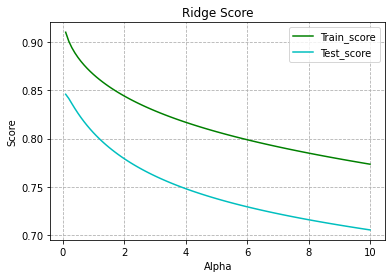

In [84]:
plt.grid(linestyle = '--')

plt.plot(alpha, train_score, color = 'g', label = 'Train_score')
plt.plot(alpha, test_score, color = 'c', label = 'Test_score')

plt.title("Ridge Score")
plt.legend(loc='best')

plt.xlabel("Alpha")
plt.ylabel("Score")

plt.show()

- 규제 강도가 높아질수록 스코어값이 내려감을 확인할 수 있다.

### W의 크기 확인

다음의 그림으로 w값의 변화량을 알 수 있다.  
alpha값이 클수록 규제강도가 강해지기 때문에 w의 절대값의 크기가 작아짐을 확인할 수 있다.  
https://matplotlib.org/api/markers_api.html 에서 그래프의 dot 모양을 확인 할 수 있다  

In [88]:
def ridge_coef_n(alpha) :
  ridge_n = Ridge(alpha = alpha) 
  ridge_n.fit(X_train, y_train)
  return ridge_n.coef_

Text(0, 0.5, 'W values')

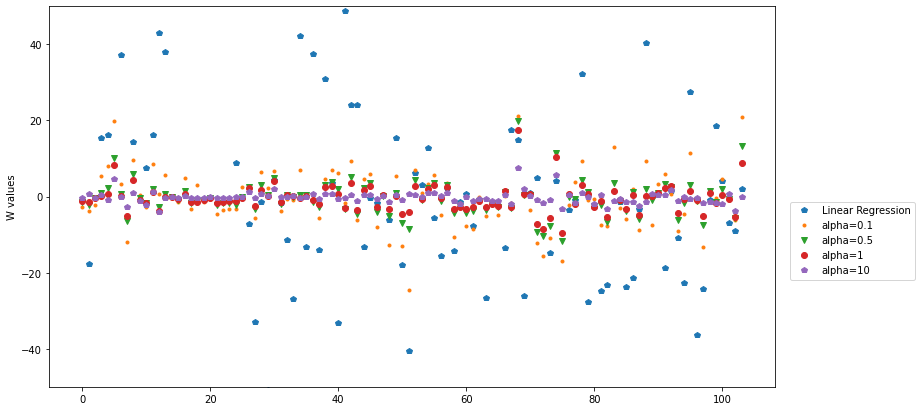

In [166]:
plt.figure(figsize=(13,7))

plt.plot(reg.coef_, 'p', label = "Linear Regression") 
plt.plot(ridge_coef_n(0.1), '.', label = "alpha=0.1") 
plt.plot(ridge_coef_n(0.5), 'v', label = "alpha=0.5") 
plt.plot(ridge_coef_n(1), 'o', label = "alpha=1") 
plt.plot(ridge_coef_n(10), 'p', label = "alpha=10") 

plt.ylim(-50,50) # y축의 범위

plt.legend(loc='cneter', bbox_to_anchor=(1.2, 0.5)) # bbox_to_anchor <= 레전의 위치

plt.ylabel("W values")

# Lasso method

- 선형 회귀모델의 복잡도를 낮춰주는 Ridge Regularization의 또다른 대안

- Ridge와는 다르게 Lasso는 w의 값이 아예 0이 되는 것이 존재하게 되어 feature selection이 자동적으로 이루어진게 된다, 즉 설명변수가 모델에서 아예 제거되는 것이 가능하다.

- Ridge와 마찬가지로 매개변수인 alpha값을 조절하여 Regularization 강도를 선택할 수 있다.

In [97]:
from sklearn.linear_model import Lasso

lasso01 = Lasso(alpha =1)

lasso01.fit(X_train,y_train)
lasso01_pred = lasso01.predict(X_test)

In [101]:
print("Training score:{:0.2f}".format(lasso01.score(X_train,y_train)))
print("Test Score:{:0.2f}".format(lasso01.score(X_test,y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test,lasso01_pred)))

print("Features :",np.sum(lasso01.coef_ !=0))

Training score:0.24
Test Score:0.23
Mean squared error:62.44
Features : 4


In [98]:
lasso01.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -4.55880522, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

- 4개의 feautre만 살아남은 것을 확인할 수 있다.

In [162]:
def lasso_N(alpha) :
  lasso_n = Lasso(alpha)
  lasso_n.fit(X_train,y_train)
  return round(lasso_n.score(X_train,y_train),2), \
         round(lasso_n.score(X_test,y_test),2), \
         np.sum(lasso_n.coef_ != 0), \
         lasso_n.coef_

### 0.01, 0.001, 0.0001

In [140]:
print(lasso_N(0.01))
print(lasso_N(0.001))
print(lasso_N(0.0001))

(0.87, 0.82, 31)
(0.92, 0.83, 78)
(0.93, 0.82, 101)


In [149]:
lasso_N(0.01)[0]

0.87

In [159]:
# alpha 값을 연속적으로 정의
alpha = [i/100 for i in range(1, 101, 1)]

In [160]:
Train_score = [lasso_N(i)[0] for i in alpha ]
Test_score = [lasso_N(i)[1] for i in alpha ]
Feature_count = [lasso_N(i)[2] for i in alpha ]

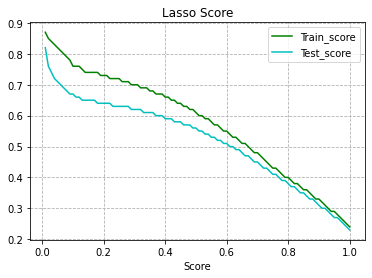

In [161]:
plt.grid(linestyle = '--')

plt.plot(alpha, Train_score, color = 'g', label = 'Train_score')
plt.plot(alpha, Test_score, color = 'c', label = 'Test_score')

plt.title("Lasso Score")
plt.legend(loc='best')

plt.xlabel("Alpha")
plt.xlabel("Score")

plt.show()

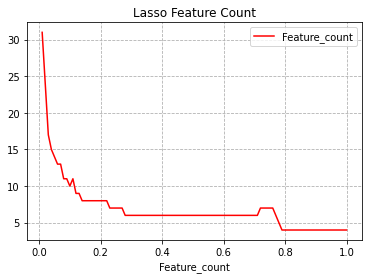

In [155]:
plt.grid(linestyle = '--')

plt.plot(alpha, Feature_count, color = 'r', label = 'Feature_count')

plt.title("Lasso Feature Count")
plt.legend(loc='best')

plt.xlabel("Alpha")
plt.xlabel("Feature_count")

plt.show()

Text(0, 0.5, 'W values')

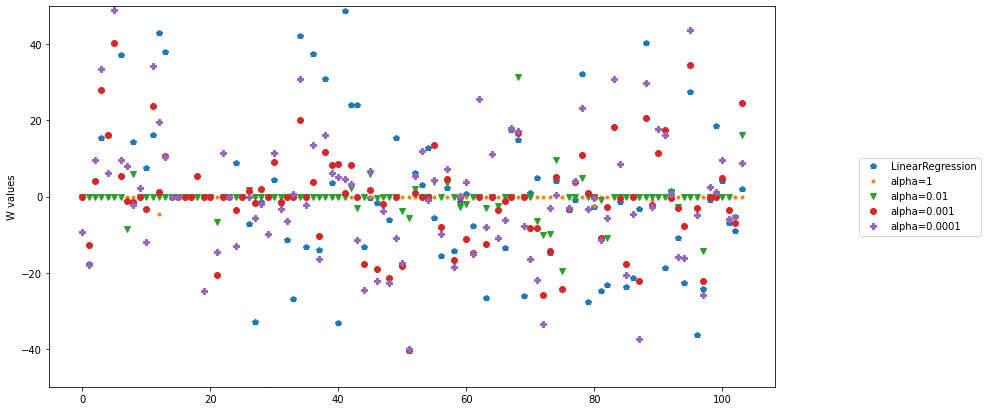

In [165]:
# alpha=1 이면 규제가 굉장히 커지므로 대부분의 w 값이 0 으로 수렴하게 된다
# 반대로 alpha 값이 작아지면 작아질수록 w 값이 점점 규제를 받지 않아 LinearRegression 과 같은 분포를 띄게 된다

plt.figure(figsize=(13,7))

plt.plot(reg.coef_, 'p', label="LinearRegression") 
plt.plot(lasso_N(1)[3], '.', label="alpha=1") 
plt.plot(lasso_N(0.01)[3], 'v', label="alpha=0.01") # v = 아래 삼각형
plt.plot(lasso_N(0.001)[3], 'o', label="alpha=0.001") 
plt.plot(lasso_N(0.0001)[3], 'P', label="alpha=0.0001") 

plt.ylim(-50, 50) # y 축의 범위

plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5)) # bbox_to_anchor=(1.2, 0.5) <= 레전드의 위치

plt.ylabel("W values")